# Acquisition and Prep

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import wrangle

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = wrangle.acquire_zillow()

## 1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


## 2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

In [5]:
df.columns.to_list()

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
 'yearbuilt',
 'taxamount',
 'fips']

In [6]:
#let's rename the columns to be more readable
df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'sqft',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built'})

In [7]:
#find nulls in each column
df.isnull().sum()

bedrooms        11
bathrooms       11
sqft          8484
tax_value      493
year_built    9337
taxamount     4442
fips             0
dtype: int64

In [8]:
df.shape

(2152863, 7)

In [9]:
# getting the percentages for the outliers
df.isnull().sum() / df.shape[0]

bedrooms      0.000005
bathrooms     0.000005
sqft          0.003941
tax_value     0.000229
year_built    0.004337
taxamount     0.002063
fips          0.000000
dtype: float64

In [10]:
#drop nulls
# they are not that important since they are small percentages of the data.
df = df.dropna()

In [11]:
#make sure all our nulls are nulls dropped
df.isnull().sum()

bedrooms      0
bathrooms     0
sqft          0
tax_value     0
year_built    0
taxamount     0
fips          0
dtype: int64

In [12]:
# train/validate/test split
train_validate, test = train_test_split(df, test_size=.2, random_state=13)
train, validate = train_test_split(train_validate, test_size=.25, random_state=13)

## 3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [13]:
#try our new wrangle module
df = wrangle.wrangle_zillow()

In [14]:
df

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152855,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0


In [15]:
#take a look at the split dataframes
train.shape, validate.shape, test.shape


((1284141, 7), (428047, 7), (428047, 7))

In [16]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,taxamount,fips
110067,3.0,1.0,1059.0,31845.0,1955.0,598.72,6037.0
563144,1.0,1.0,1808.0,1452242.0,1943.0,18608.99,6037.0
1351082,3.0,1.0,1052.0,57163.0,1950.0,970.22,6037.0
2101220,4.0,3.0,2287.0,299396.0,1989.0,4556.95,6037.0
1480090,3.0,1.0,1096.0,445278.0,1954.0,5431.10,6037.0


# Scaling Numeric Data

## Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pydataset

from sklearn.neighbors import KNeighborsClassifier

In [18]:
train, validate, test = wrangle.split_clean_zillow()

train: (1278128, 7)
validate: (426043, 7)
test: (426043, 7)


## 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [20]:
train.columns

Index(['bedrooms', 'bathrooms', 'sqft', 'home_value', 'year_built', 'sale_tax',
       'fips'],
      dtype='object')

In [21]:
to_scale = ['bedrooms','bathrooms','sqft','year_built','sale_tax']

In [22]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    #create subplot structure
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(12,12))

    #copy the df for scaling
    df_scaled = df.copy()
    
    #fit and transform the df
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    #plot the pre-scaled data next to the post-scaled data in one row of a subplot
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

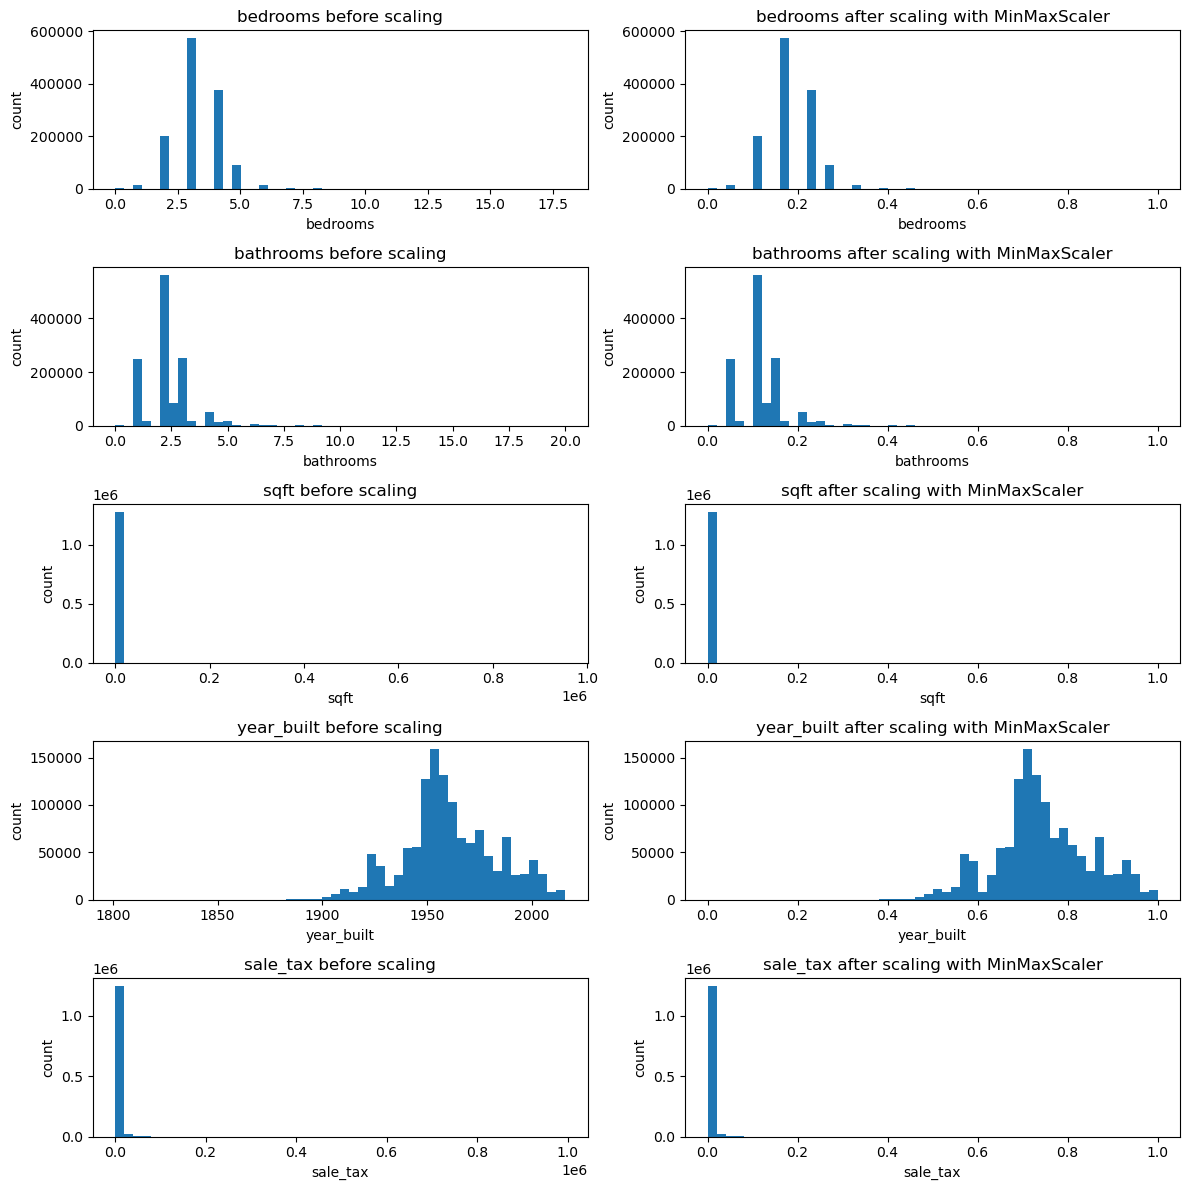

In [23]:
# call function with minmax
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

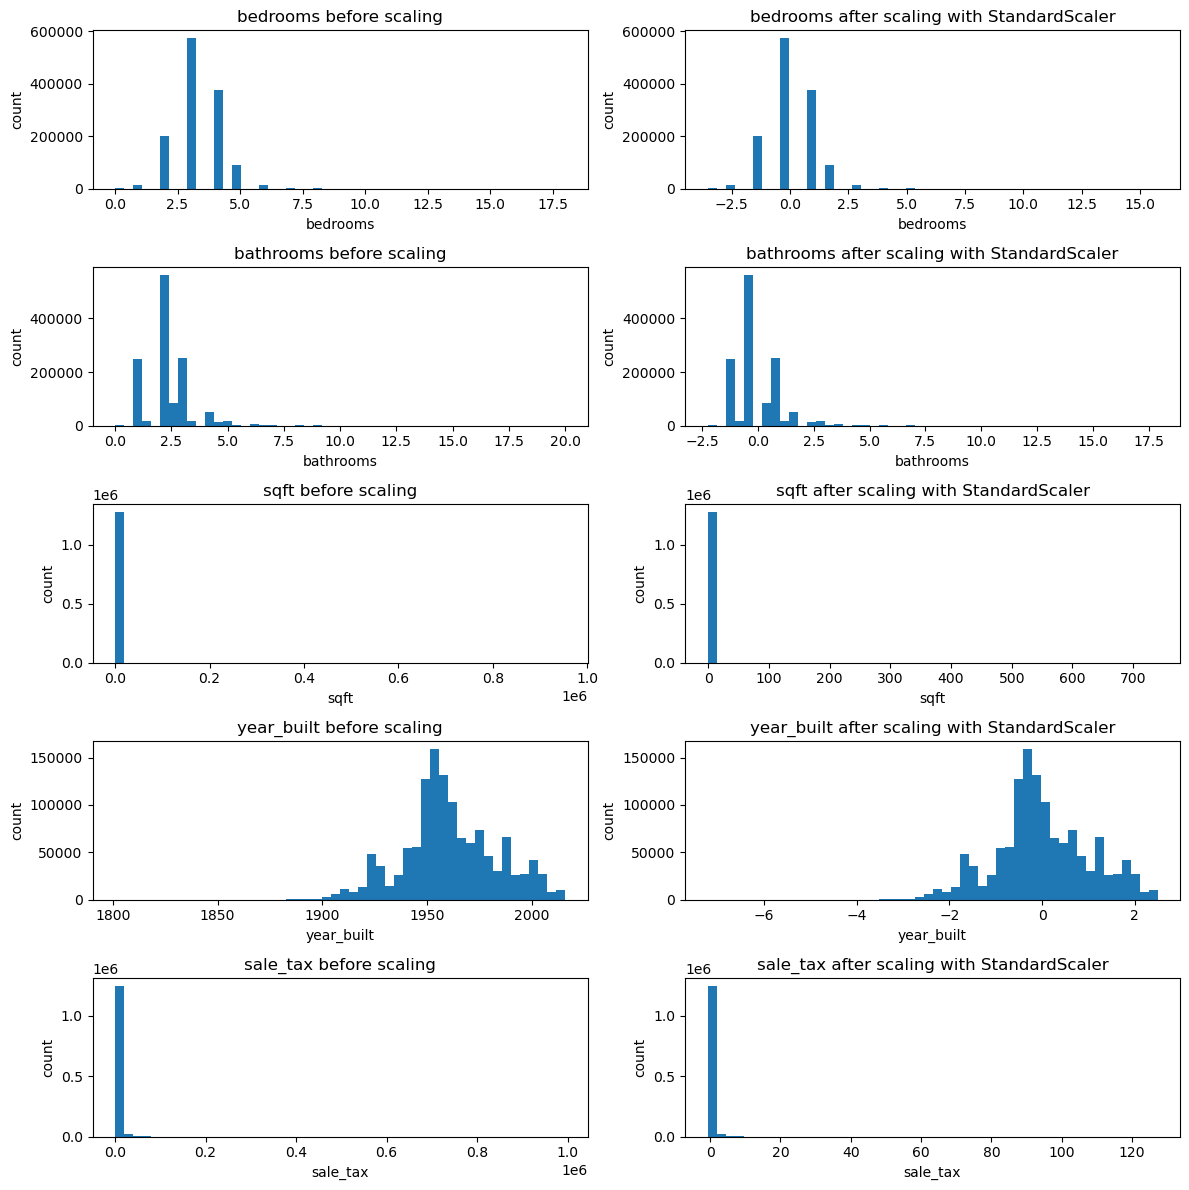

In [24]:
# call function with standard scaler
visualize_scaler(scaler=StandardScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

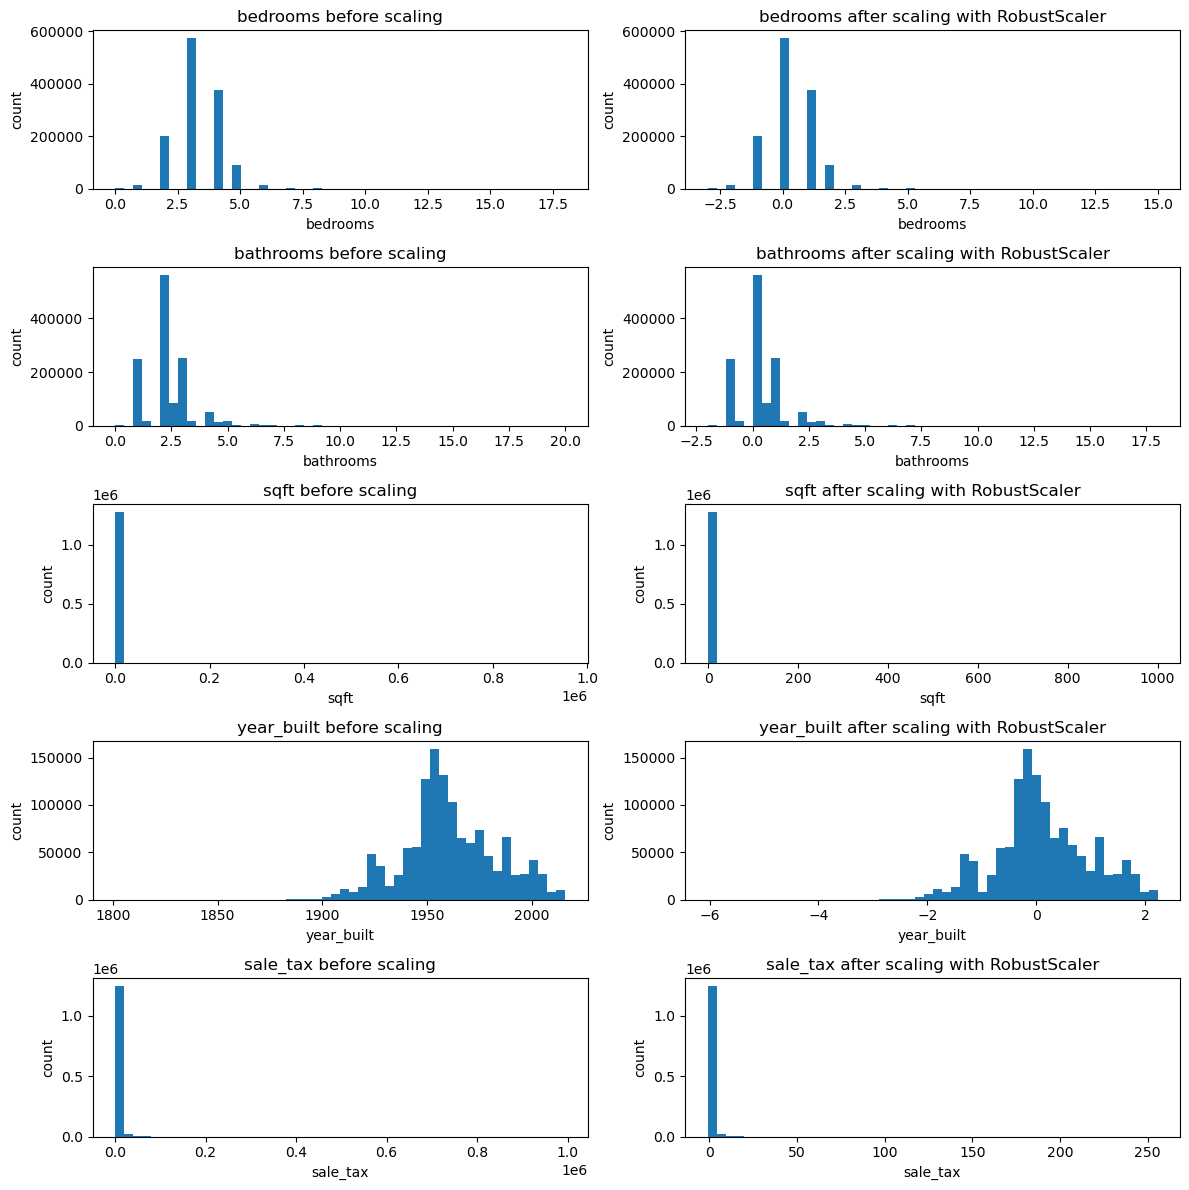

In [25]:
# call function with robustscaler
visualize_scaler(scaler=RobustScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [26]:
#look at original data
train[to_scale].head()

,bedrooms,bathrooms,sqft,year_built,sale_tax
107815,3.0,1.5,1480.0,1900.0,2798.60
304808,4.0,3.0,2863.0,1967.0,21681.16
2036858,3.0,3.0,1793.0,2002.0,2468.05
802962,4.0,2.0,1590.0,1952.0,8013.93
1662966,4.0,3.0,1946.0,1959.0,5394.41


In [29]:
#make it
scaler = MinMaxScaler()

#fit and use it
train_scaled = scaler.fit_transform(train[to_scale])

#convert to df
train_scaled = pd.DataFrame(train_scaled, columns=to_scale)

In [30]:
#look at scaled data
train_scaled.head()

,bedrooms,bathrooms,sqft,year_built,sale_tax
0,0.166667,0.075,0.001553,0.460465,0.002809
1,0.222222,0.150,0.003004,0.772093,0.021805
2,0.166667,0.150,0.001881,0.934884,0.002477
3,0.222222,0.100,0.001668,0.702326,0.008056
4,0.222222,0.150,0.002042,0.734884,0.005420


In [31]:
#appling the inverse_transform function to the scaled data
inverse_train_scaled = scaler.inverse_transform(train_scaled)
inverse_train_scaled

array([[3.000000e+00, 1.500000e+00, 1.480000e+03, 1.900000e+03,
        2.798600e+03],
       [4.000000e+00, 3.000000e+00, 2.863000e+03, 1.967000e+03,
        2.168116e+04],
       [3.000000e+00, 3.000000e+00, 1.793000e+03, 2.002000e+03,
        2.468050e+03],
       ...,
       [3.000000e+00, 2.000000e+00, 1.680000e+03, 1.976000e+03,
        5.362280e+03],
       [3.000000e+00, 1.000000e+00, 1.165000e+03, 1.949000e+03,
        4.006750e+03],
       [4.000000e+00, 4.000000e+00, 3.907000e+03, 1.978000e+03,
        1.479891e+04]])

In [33]:
#converting 2d array to df and adding column names
inverted_train = pd.DataFrame(inverse_train_scaled, columns=to_scale)
inverted_train.head()

,bedrooms,bathrooms,sqft,year_built,sale_tax
0,3.0,1.5,1480.0,1900.0,2798.60
1,4.0,3.0,2863.0,1967.0,21681.16
2,3.0,3.0,1793.0,2002.0,2468.05
3,4.0,2.0,1590.0,1952.0,8013.93
4,4.0,3.0,1946.0,1959.0,5394.41


In [34]:
train.reset_index(drop=True)

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
0,3.0,1.5,1480.0,239760.0,1900.0,2798.60,6111.0
1,4.0,3.0,2863.0,1791635.0,1967.0,21681.16,6037.0
2,3.0,3.0,1793.0,223027.0,2002.0,2468.05,6037.0
3,4.0,2.0,1590.0,422110.0,1952.0,8013.93,6037.0
4,4.0,3.0,1946.0,434229.0,1959.0,5394.41,6037.0
...,...,...,...,...,...,...,...
1278123,5.0,3.0,2932.0,510644.0,2001.0,8607.43,6037.0
1278124,3.0,2.0,1354.0,94993.0,1990.0,2073.91,6037.0
1278125,3.0,2.0,1680.0,427436.0,1976.0,5362.28,6037.0
1278126,3.0,1.0,1165.0,331370.0,1949.0,4006.75,6037.0


In [35]:
inverted_train

,bedrooms,bathrooms,sqft,year_built,sale_tax
0,3.0,1.5,1480.0,1900.0,2798.60
1,4.0,3.0,2863.0,1967.0,21681.16
2,3.0,3.0,1793.0,2002.0,2468.05
3,4.0,2.0,1590.0,1952.0,8013.93
4,4.0,3.0,1946.0,1959.0,5394.41
...,...,...,...,...,...
1278123,5.0,3.0,2932.0,2001.0,8607.43
1278124,3.0,2.0,1354.0,1990.0,2073.91
1278125,3.0,2.0,1680.0,1976.0,5362.28
1278126,3.0,1.0,1165.0,1949.0,4006.75


In [36]:
train.drop(columns=['fips', 'home_value']).reset_index(drop=True) == inverted_train

,bedrooms,bathrooms,sqft,year_built,sale_tax
0,True,False,True,True,True
1,True,False,True,True,True
2,True,False,True,True,True
3,True,True,True,True,True
4,True,False,True,False,True
...,...,...,...,...,...
1278123,False,False,True,True,True
1278124,True,True,True,False,True
1278125,True,True,True,True,True
1278126,True,True,True,False,True


## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [37]:
from sklearn.preprocessing import QuantileTransformer

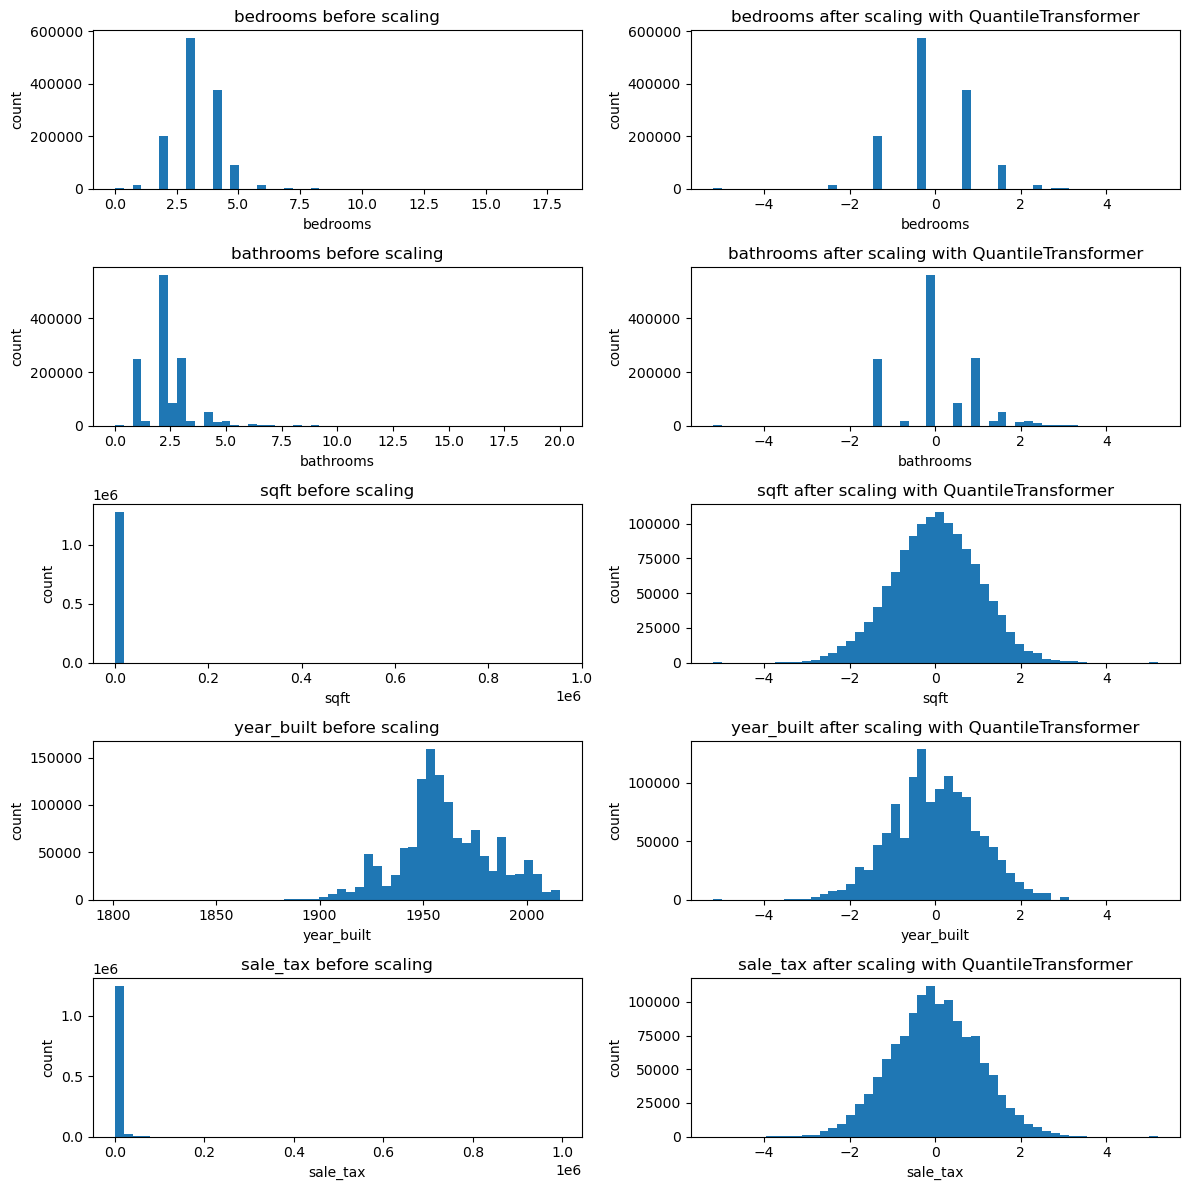

In [38]:
# call function using QuantileTransformer
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 columns_to_scale=to_scale, 
                 bins=50)

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

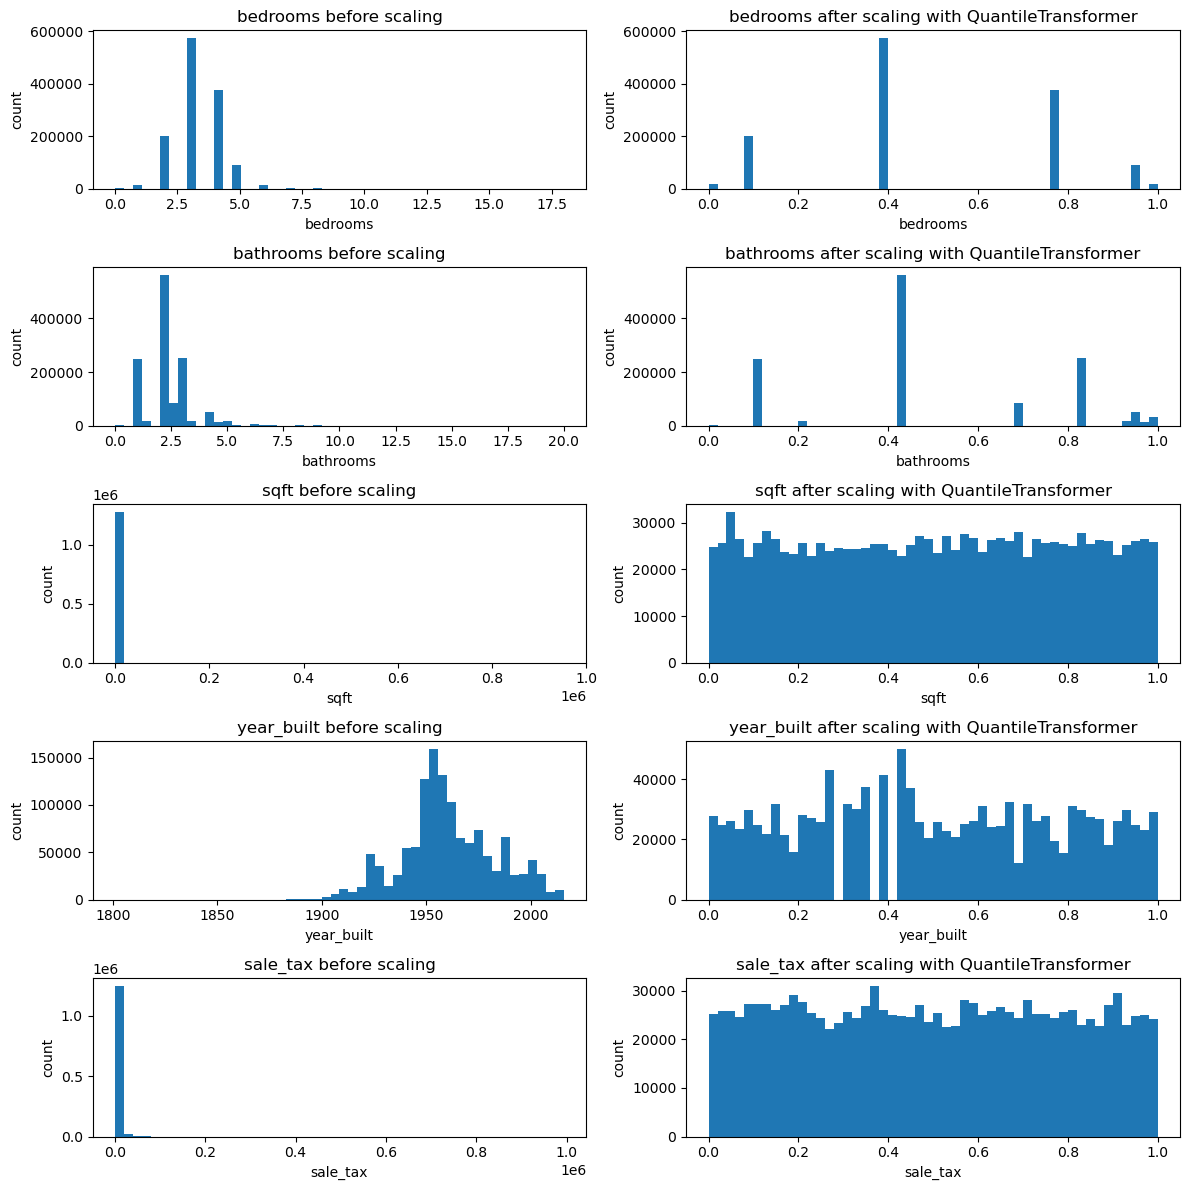

In [39]:
# call function using QuantileTransformer
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train,
                 columns_to_scale=to_scale, 
                 bins=50)

## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [40]:
train.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
107815,3.0,1.5,1480.0,239760.0,1900.0,2798.60,6111.0
304808,4.0,3.0,2863.0,1791635.0,1967.0,21681.16,6037.0
2036858,3.0,3.0,1793.0,223027.0,2002.0,2468.05,6037.0
802962,4.0,2.0,1590.0,422110.0,1952.0,8013.93,6037.0
1662966,4.0,3.0,1946.0,434229.0,1959.0,5394.41,6037.0


In [41]:
to_scale

['bedrooms', 'bathrooms', 'sqft', 'year_built', 'sale_tax']

In [43]:
def scale_data(train, 
               validate, 
               test, 
               to_scale):
    #make copies for scaling
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()

    #scale them!
    #make the thing
    scaler = MinMaxScaler()

    #fit the thing
    scaler.fit(train[to_scale])

    #use the thing
    train_scaled[to_scale] = scaler.transform(train[to_scale])
    validate_scaled[to_scale] = scaler.transform(validate[to_scale])
    test_scaled[to_scale] = scaler.transform(test[to_scale])
    
    return train_scaled, validate_scaled, test_scaled

In [44]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, to_scale)

In [45]:
train.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
107815,3.0,1.5,1480.0,239760.0,1900.0,2798.60,6111.0
304808,4.0,3.0,2863.0,1791635.0,1967.0,21681.16,6037.0
2036858,3.0,3.0,1793.0,223027.0,2002.0,2468.05,6037.0
802962,4.0,2.0,1590.0,422110.0,1952.0,8013.93,6037.0
1662966,4.0,3.0,1946.0,434229.0,1959.0,5394.41,6037.0


In [46]:
train_scaled.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
107815,0.166667,0.075,0.001553,239760.0,0.460465,0.002809,6111.0
304808,0.222222,0.150,0.003004,1791635.0,0.772093,0.021805,6037.0
2036858,0.166667,0.150,0.001881,223027.0,0.934884,0.002477,6037.0
802962,0.222222,0.100,0.001668,422110.0,0.702326,0.008056,6037.0
1662966,0.222222,0.150,0.002042,434229.0,0.734884,0.005420,6037.0


# Exploration

# In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

## 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

## 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [48]:
train, validate, test = wrangle.split_clean_zillow()

train: (1278128, 7)
validate: (426043, 7)
test: (426043, 7)


In [67]:
train


,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
107815,3.0,1.5,1480.0,239760.0,1900.0,2798.60,6111.0
304808,4.0,3.0,2863.0,1791635.0,1967.0,21681.16,6037.0
2036858,3.0,3.0,1793.0,223027.0,2002.0,2468.05,6037.0
802962,4.0,2.0,1590.0,422110.0,1952.0,8013.93,6037.0
1662966,4.0,3.0,1946.0,434229.0,1959.0,5394.41,6037.0
...,...,...,...,...,...,...,...
1947824,5.0,3.0,2932.0,510644.0,2001.0,8607.43,6037.0
713067,3.0,2.0,1354.0,94993.0,1990.0,2073.91,6037.0
1573664,3.0,2.0,1680.0,427436.0,1976.0,5362.28,6037.0
857274,3.0,1.0,1165.0,331370.0,1949.0,4006.75,6037.0


## 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [72]:
sample = train.sample(10000)

def plot_variable_pairs(df):
    sns.set(style="ticks")
    sns.pairplot(df, kind="reg", diag_kind="kde")
    plt.show()


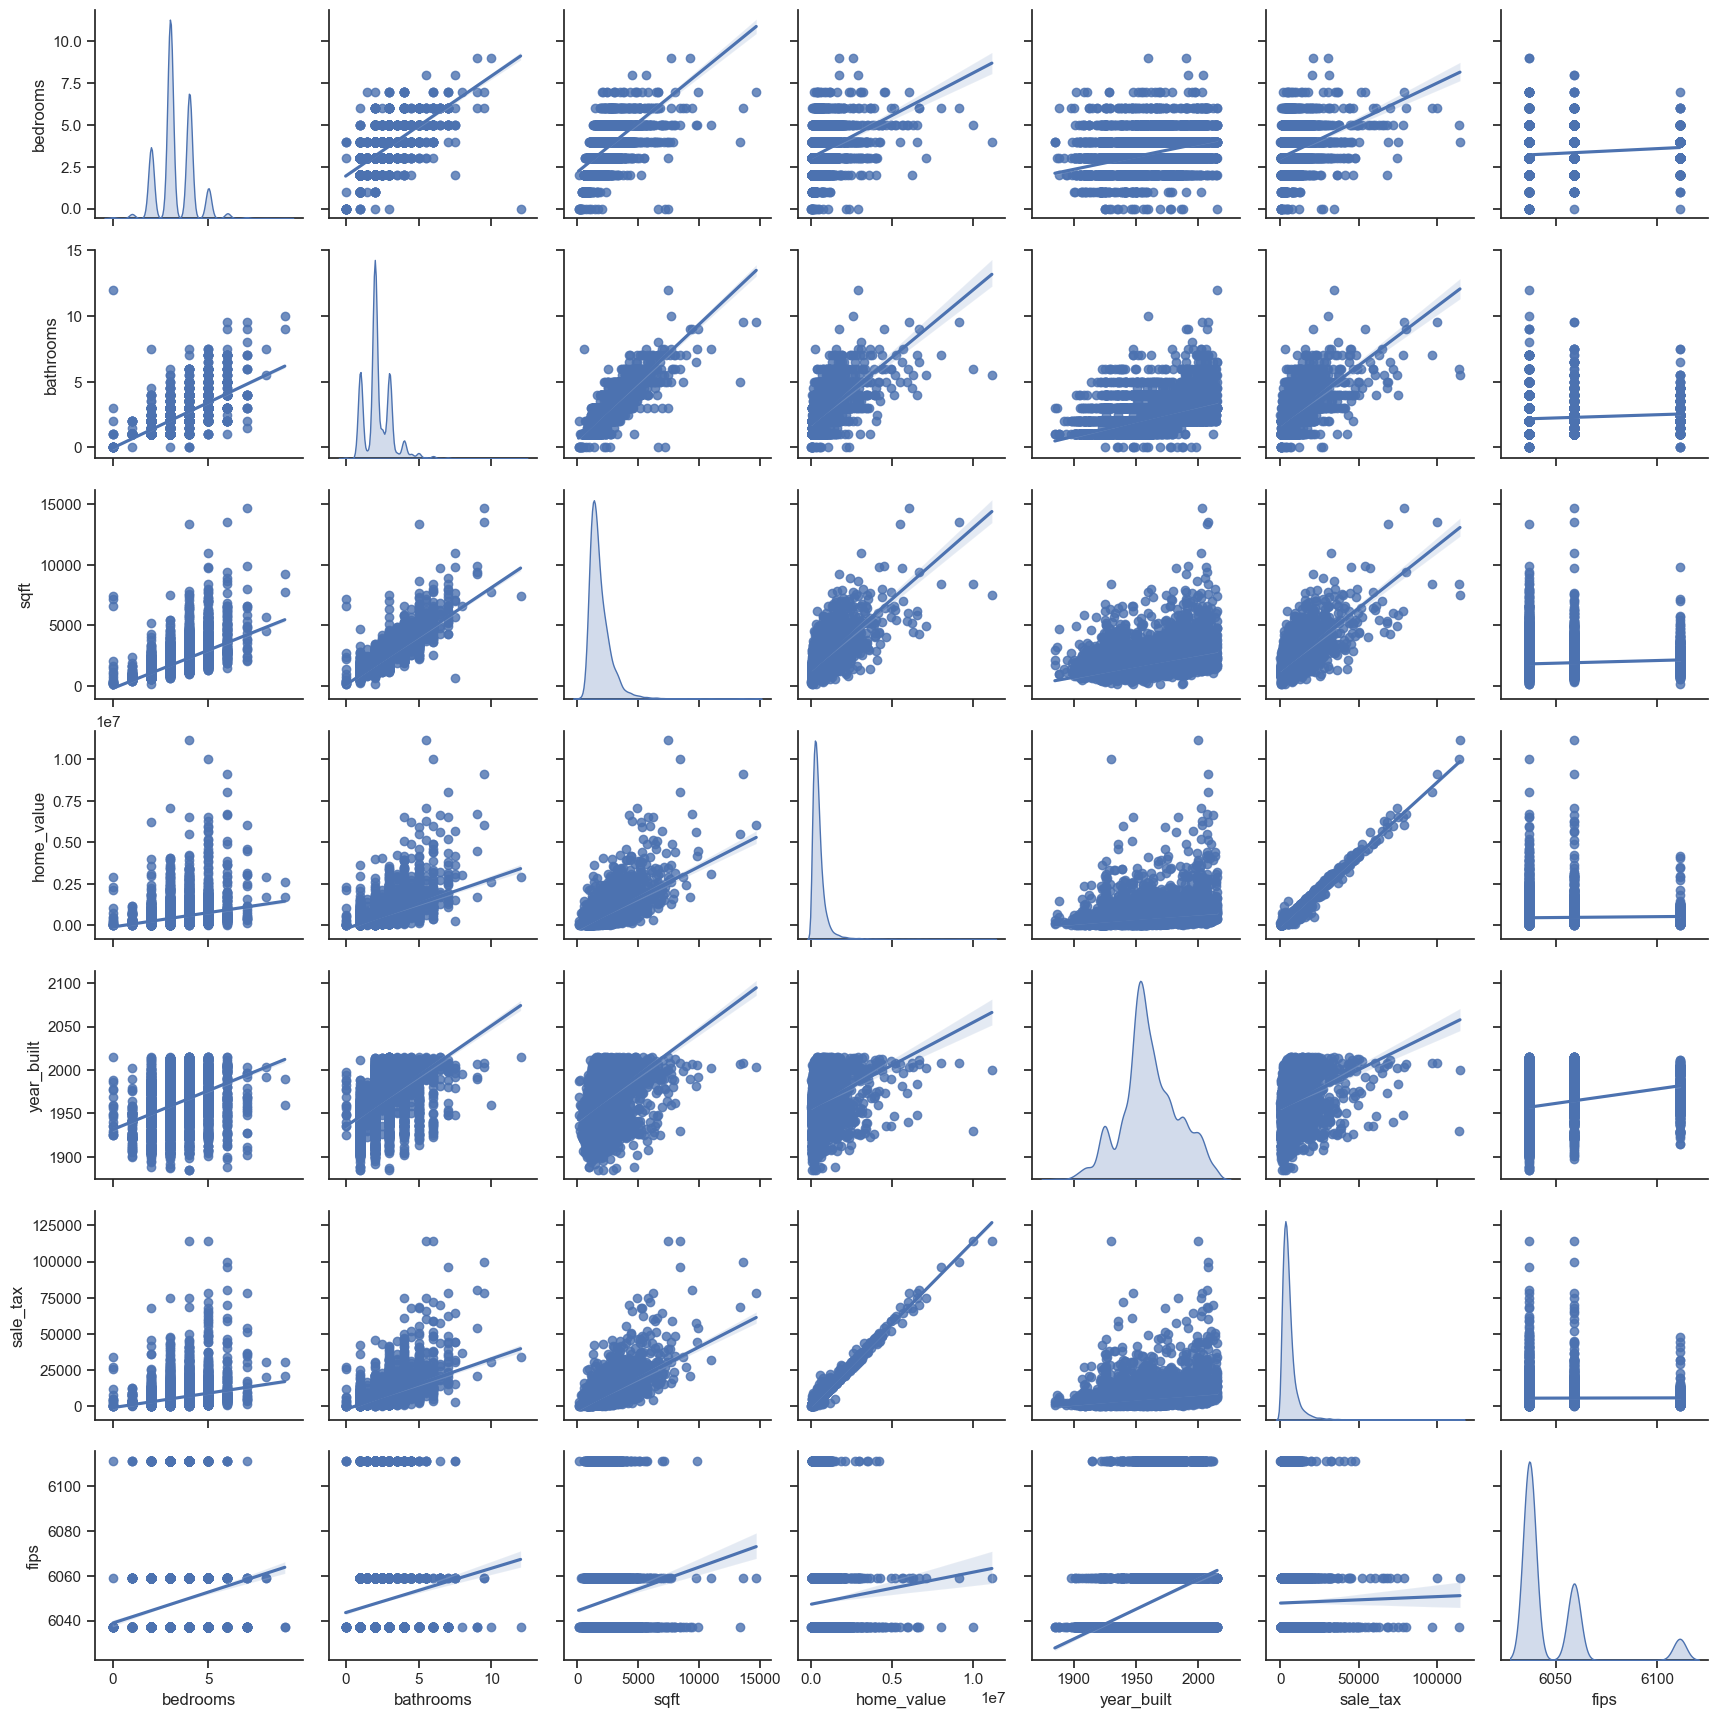

In [73]:
plot_variable_pairs(sample)

## 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

## 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

## 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

## 7. Come up with some initial hypotheses based on your goal of predicting property value.

## 8. Visualize all combinations of variables in some way.

## 9. Run the appropriate statistical tests where needed.

## 10. What independent variables are correlated with the dependent variable, home value?

## 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

## 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

## 13. Explore your dataset with any other visualizations you think will be helpful.